In [1]:
#| hide
!pip install -Uqq nixtla

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.5 MB/s eta 0:00:00


In [3]:
#| hide
IN_COLAB = in_colab()

In [4]:
#| hide
if not IN_COLAB:
    from nixtla.utils import colab_badge
    from dotenv import load_dotenv

In [5]:
#| echo: false
if not IN_COLAB:
    load_dotenv()
    colab_badge('docs/capabilities/online-anomaly-detection/01_quickstart')

In [30]:
import pandas as pd
from nixtla import NixtlaClient
import matplotlib.pyplot as plt

In [38]:
nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = 'nixak-Vk5dH8f4bGPAKHwIeiF78KwOwsEXEumXCojAT20sZrqArnMOyP48wPMasBtDUZdO8Me86hnqPmfwDjtx'
)

In [24]:
#| hide
if not IN_COLAB:
    nixtla_client = NixtlaClient()

In [39]:
df = pd.read_csv('https://gist.githubusercontent.com/gokul102/79c3f9e5a50b12ec8a7f9bdf285c950b/raw/b2e9d2b3f2f29e48e114717ca3aa8e6e937668ec/90_days_disk_read.csv', parse_dates=['ds'])

<ipython-input-39-511624638ca0>:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('https://gist.githubusercontent.com/gokul102/79c3f9e5a50b12ec8a7f9bdf285c950b/raw/b2e9d2b3f2f29e48e114717ca3aa8e6e937668ec/90_days_disk_read.csv', parse_dates=['ds'])


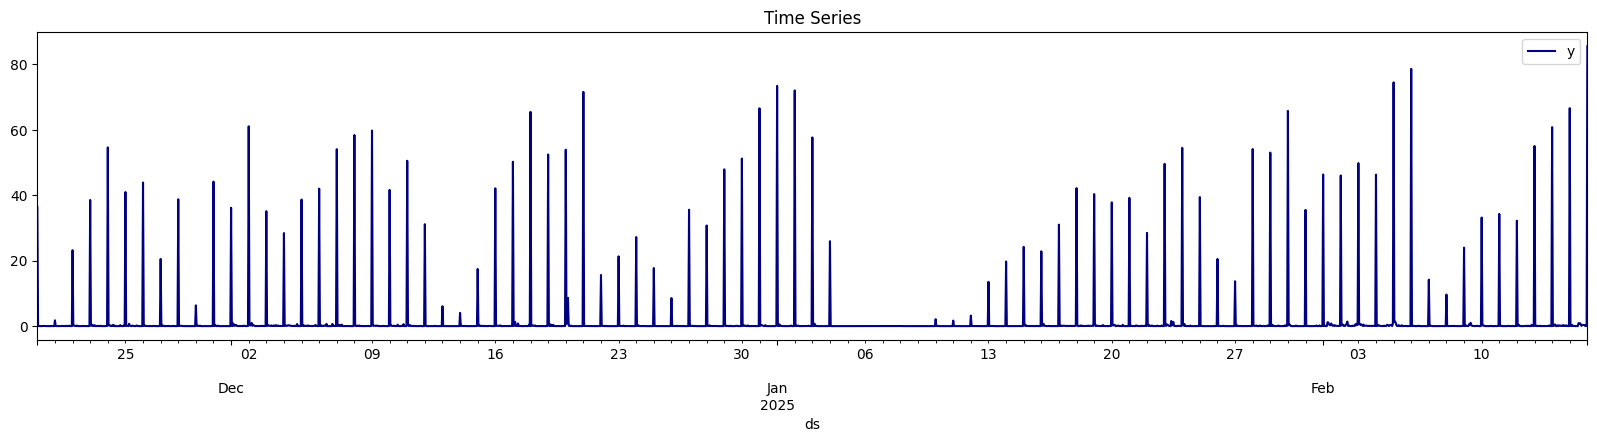

In [40]:
#| echo: false
ax = df.plot(x='ds', y='y', color = 'navy', title='Time Series', figsize=(20, 4))
plt.show()

In [56]:
anomaly_online = nixtla_client.detect_anomalies_online(
    df,
    id_col = 'unique_id',
    time_col='ds',
    target_col='y',
    freq='H',                       # Specify the frequency of the data
    h=10,                           # Specify the forecast horizon
    finetune_steps = 10,            # Number of steps for fine-tuning TimeGPT on new data
    finetune_depth = 2,             # Intensity of finetuning
    finetune_loss = 'mae',          # Loss function used during the finetuning process
    level=70,                       # Set the confidence level for anomaly detection
    detection_size=1800,            # How many steps you want for analyzing anomalies
)
anomaly_online.tail()

/usr/local/lib/python3.11/dist-packages/utilsforecast/preprocessing.py:131: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset = pd.tseries.frequencies.to_offset(freq)


,unique_id,ds,y,TimeGPT,anomaly,anomaly_score,TimeGPT-hi-70,TimeGPT-lo-70
1795,0,2025-02-15 20:00:00,0.352750,0.861078,False,-0.055241,6.659176,-4.937020
1796,0,2025-02-15 21:00:00,0.051500,0.210953,False,0.007121,6.009051,-5.587145
1797,0,2025-02-15 22:00:00,0.133583,0.963240,False,-0.112680,6.761337,-4.834858
1798,0,2025-02-15 23:00:00,0.035278,3.900408,False,-0.655283,9.698505,-1.897690
1799,0,2025-02-16 00:00:00,85.587167,28.912788,True,10.166398,34.710888,23.114690


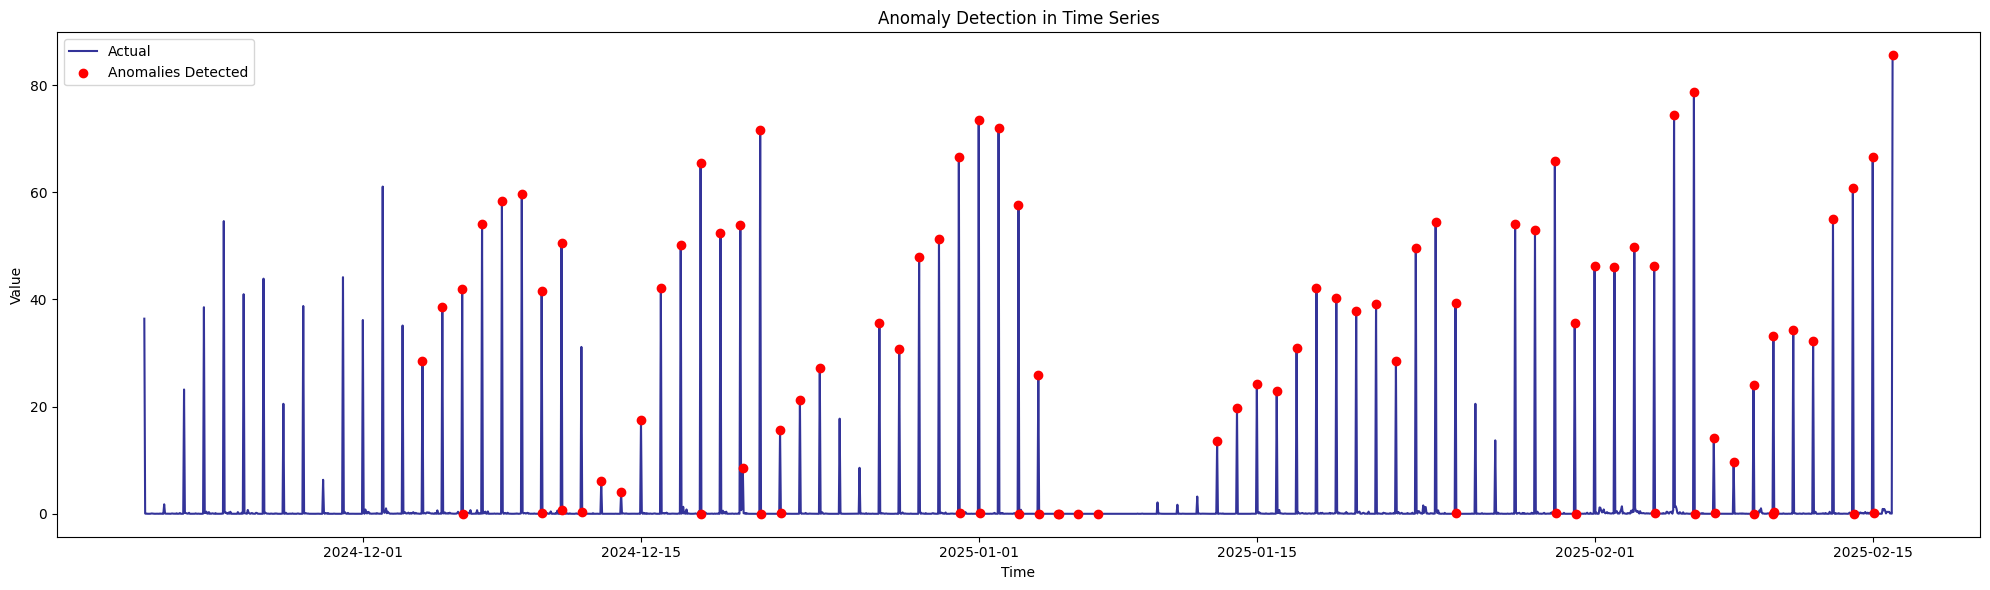

In [57]:
# Plot the anomalies
def plot_anomalies(df, anomaly_df, time_col='ds', target_col='y'):
    plt.figure(figsize=(20, 6))

    # Plot the actual data
    plt.plot(df[time_col], df[target_col], label='Actual', color='navy', alpha=0.8)


    # Highlight the anomalies
    anomalies = anomaly_df[anomaly_df['anomaly'] == True]
    plt.scatter(anomalies[time_col], anomalies[target_col], color='red', label='Anomalies Detected', zorder=5)

    plt.title('Anomaly Detection in Time Series')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_anomalies(df, anomaly_online, time_col='ds', target_col='y')